In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset
df_aluguel = pd.read_csv('./dataset/dataset_aluguel.csv')

In [3]:
# Checar dataset
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


### Feature Engineering

In [4]:
# Remover a coluna id
df_aluguel.drop(columns=['id'], axis=1, inplace=True)

In [5]:
# Renomear as colunas
df_aluguel = df_aluguel.rename(columns={
  'localizacao_Subúrbio': 'localizacao_suburbio',
  'localizacao_Periferia': 'localizacao_periferia',
})

In [6]:
# Converter o True para 1 e False para 0 das colunas localizacao_periferia e localizacao_suburbio
df_aluguel['localizacao_periferia'] = df_aluguel['localizacao_periferia'].astype(int)
df_aluguel['localizacao_suburbio'] = df_aluguel['localizacao_suburbio'].astype(int)

### EDA

In [7]:
# Visualizar os primeiros registros
df_aluguel.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
0,106.181018,1,36.760806,0,1,0,1767.122088
1,192.607146,4,10.453581,1,1,0,3278.742397
2,159.799091,5,27.072399,1,1,0,2953.899737
3,139.798773,4,34.789220,1,0,1,2514.717108
4,73.402796,5,11.427501,0,0,1,1942.164396


In [8]:
df_aluguel['n_quartos'].unique(), df_aluguel['garagem'].unique(), df_aluguel['localizacao_periferia'].unique(), df_aluguel['localizacao_suburbio'].unique()

(array([1, 4, 5, 3, 2]), array([0, 1]), array([1, 0]), array([0, 1]))

In [9]:
# Detectar valores ausentes
df_aluguel.isna().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_periferia    0
localizacao_suburbio     0
valor_aluguel            0
dtype: int64

In [10]:
# Medidas estatísticas do dataset
df_aluguel.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,0.280000,0.400000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,0.451261,0.492366,514.314100
min,50.828318,1.000000,0.259243,0.000000,0.000000,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,0.000000,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,0.000000,0.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,1.000000,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,1.000000,1.000000,3278.742397


<Axes: xlabel='tamanho_m2'>

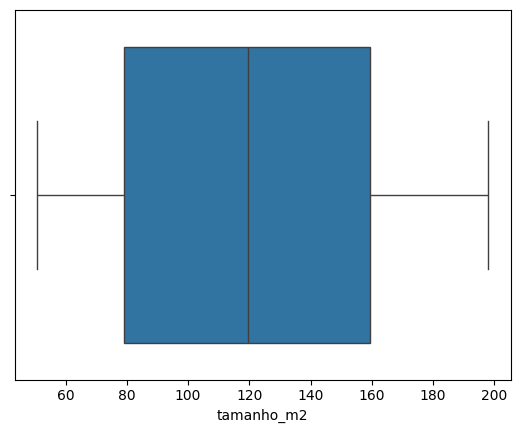

In [11]:
# Detectar outliers - tamanho_m2
sns.boxplot(data=df_aluguel, x='tamanho_m2')

<Axes: xlabel='n_quartos'>

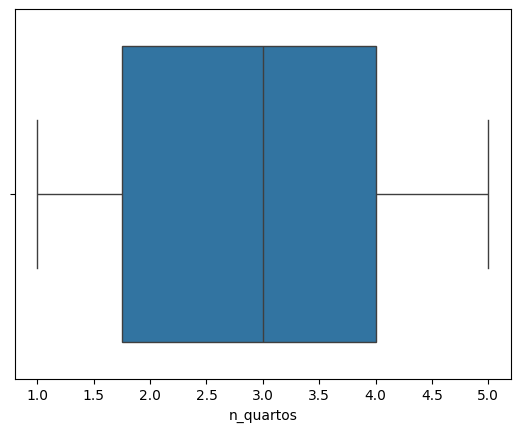

In [12]:
# Detectar outliers - n_quartos
sns.boxplot(data=df_aluguel, x='n_quartos')

<Axes: xlabel='idade_casa'>

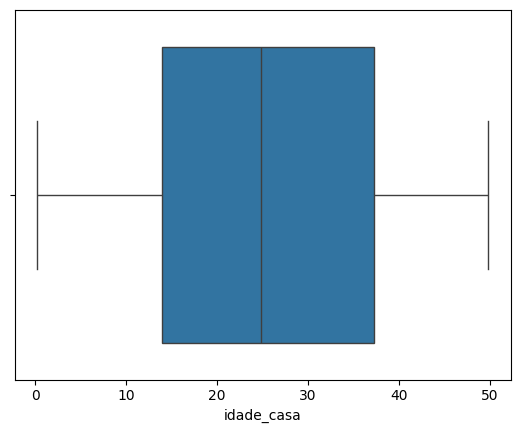

In [13]:
# Detectar outliers - idade_casa
sns.boxplot(data=df_aluguel, x='idade_casa')

<Axes: xlabel='valor_aluguel'>

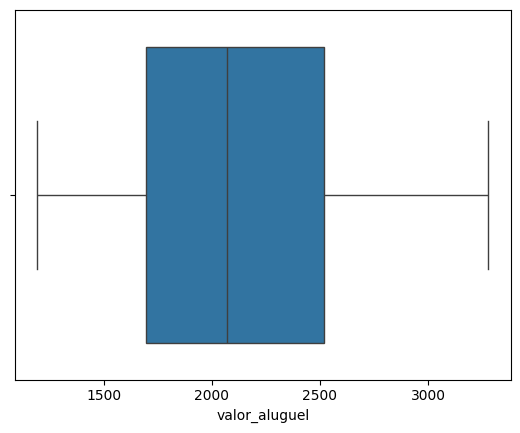

In [14]:
# Detectar outliers - valor_aluguel
sns.boxplot(data=df_aluguel, x='valor_aluguel')

<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

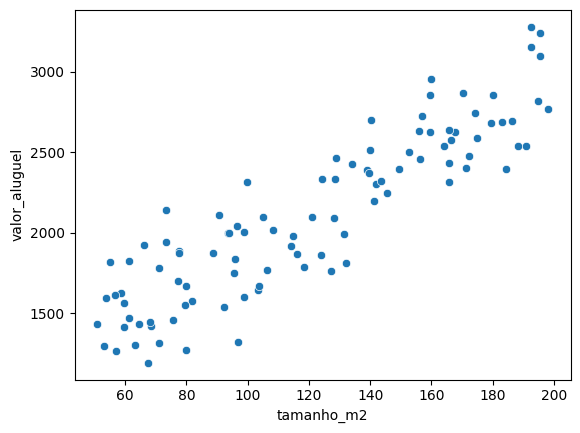

In [15]:
# Cruzamento das variáveis com valor do aluguel
sns.scatterplot(data=df_aluguel, x='tamanho_m2', y='valor_aluguel')

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

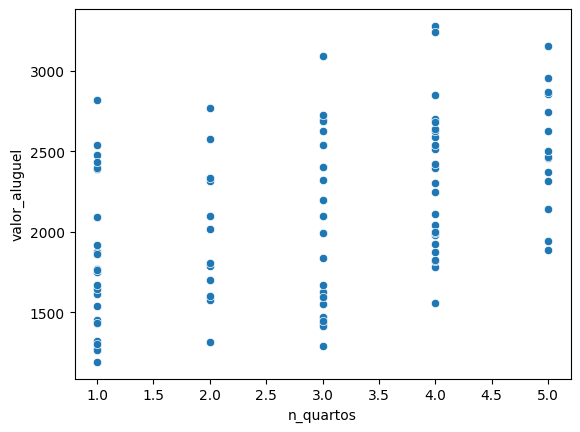

In [16]:
# Cruzamento das variáveis com valor do aluguel
sns.scatterplot(data=df_aluguel, x='n_quartos', y='valor_aluguel')

<Axes: xlabel='idade_casa', ylabel='valor_aluguel'>

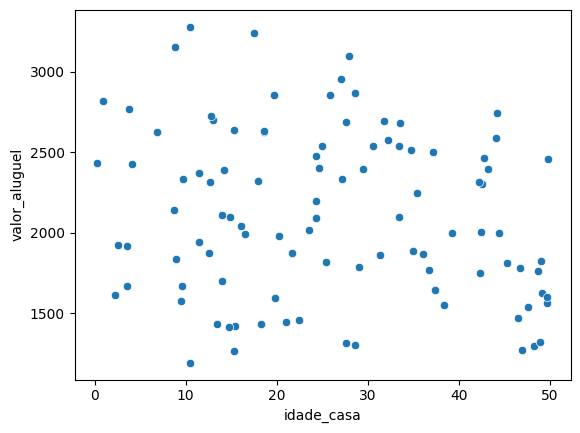

In [17]:
# Cruzamento das variáveis com valor do aluguel
sns.scatterplot(data=df_aluguel, x='idade_casa', y='valor_aluguel')

<Axes: >

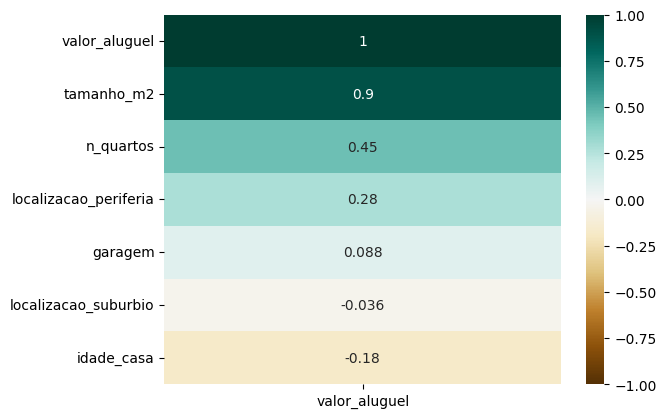

In [18]:
# Formato de Ranking, somente correlação com a variável target (valor_aluguel)
sns.heatmap(df_aluguel.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

### Treinar modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
X = df_aluguel.drop(columns=['valor_aluguel'], axis=1)
y = df_aluguel['valor_aluguel']

In [21]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [22]:
# Exibir o tamanho dos datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 6), (30, 6), (70,), (30,))

In [23]:
# Instanciar o StandardScaler
transformer = StandardScaler()

# Colunas numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [24]:
# Criar ColumnTransformer
preprocessor = ColumnTransformer(
  transformers = [
    ('num', transformer, num_cols)
  ]
)

In [25]:
# Criando o Pipeline
model_reg = Pipeline(
  steps = [
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
  ]
)

In [26]:
# Treinar o modelo
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem',
       'localizacao_periferia', 'localizacao_suburbio'],
      dtype='object'))])),
                ('model', LinearRegression())])

### Análise de métricas

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
# Gerar previsões
y_pred = model_reg.predict(X_test)

In [29]:
# Calcular o R2
r2_score(y_test, y_pred)

0.9916999333653813

In [30]:
# Calcular o MAE
mean_absolute_error(y_test, y_pred)

40.15575839939343

In [31]:
# Calcular o MSE
mean_squared_error(y_test, y_pred)

2545.817000309965

### Análise de Resíduos

In [32]:
from scipy.stats import zscore
import pingouin as pg

In [33]:
# Calcular os resíduos
residuos = y_test - y_pred

In [34]:
residuos_std = zscore(residuos)

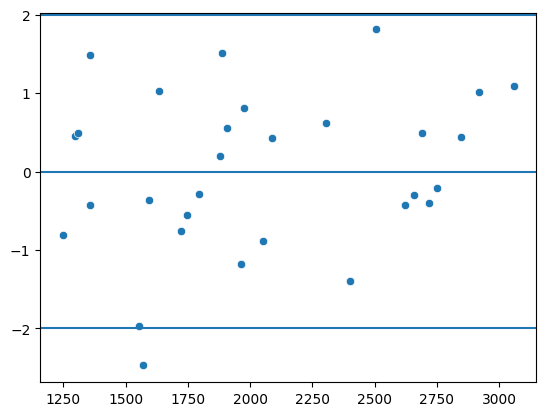

In [35]:
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

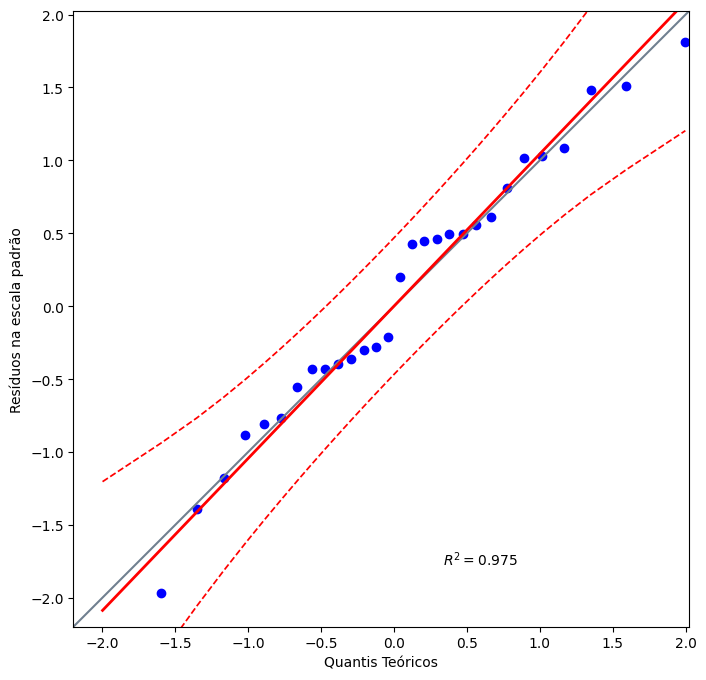

In [36]:
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()